## Feature Extraction using Correlation Matrix with genre as target


In [16]:
import ast
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

from minisom import MiniSom
from sklearn.preprocessing import minmax_scale, scale

In [2]:
data = pd.read_csv('../data_local/tracks_with_genres.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531191 entries, 0 to 531190
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        531191 non-null  int64  
 1   id                531191 non-null  object 
 2   name              531191 non-null  object 
 3   popularity        531191 non-null  int64  
 4   duration_ms       531191 non-null  int64  
 5   explicit          531191 non-null  int64  
 6   artists           531191 non-null  object 
 7   id_artists        531191 non-null  object 
 8   release_date      531191 non-null  object 
 9   danceability      531191 non-null  float64
 10  energy            531191 non-null  float64
 11  key               531191 non-null  int64  
 12  loudness          531191 non-null  float64
 13  mode              531191 non-null  int64  
 14  speechiness       531191 non-null  float64
 15  acousticness      531191 non-null  float64
 16  instrumentalness  53

In [3]:
# Convert columns containing lists to actual Python lists
data['genres'] = data['genres'].apply(ast.literal_eval)


In [4]:
explode_genres = data.explode('genres').dropna()
#artists_to_genres.columns = ['artist_id', 'genre']
explode_genres.head()

,Unnamed: 0,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres
0,0,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,tango
0,0,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,vintage tango
1,1,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,tango
1,1,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,vintage tango
2,2,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,...,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,adult standards


In [5]:
keylist = ['rock',
 'filmi',
 'adult standards',
 'classical',
 'classic rock',
 'mellow gold',
 'classical performance',
 'latin',
 'soft rock',
 'album rock',
 'sufi',
 'folk rock',
 'vocal jazz',
 'classic bollywood',
 'desi pop']



In [6]:
#data[data.isin('')]
explode_genres_1 = explode_genres['genres'].isin(keylist)
explode_genres[explode_genres_1]

,Unnamed: 0,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres
2,2,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,...,-16.900,0,0.0390,0.9890,0.130000,0.3110,0.1960,103.220,4,adult standards
3,3,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,...,-12.343,1,0.0382,0.9940,0.247000,0.0977,0.0539,118.891,4,adult standards
14,14,1HXdv1z9RlvrcUernyf0MY,The Dear Little Shamrock,0,191613,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.347,...,-15.652,1,0.0504,0.9910,0.000133,0.1960,0.2460,109.338,3,adult standards
17,17,1MD0Obbza9l0t0Zpgcwagy,And Mimi,0,186147,0,"['Dick Haymes', 'Gordon Jenkins', 'His Orchest...","['3BiJGZsyX9sJchTqcSA7Su', '58wzyK6DupVsypvs3Q...",1922,0.284,...,-15.733,0,0.0453,0.9800,0.081300,0.3450,0.2260,77.234,3,adult standards
18,18,1O9iZyzufN1fUdVO97mmm5,How High the Moon,0,175333,0,"['Dick Haymes', 'Harry James', 'His Orchestra']","['3BiJGZsyX9sJchTqcSA7Su', '5MpELOfAiq7aIBTij3...",1922,0.328,...,-11.573,1,0.0484,0.9890,0.277000,0.2100,0.2590,117.225,4,adult standards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531026,531026,2NxIIb2OZ1DSbfWAH0W47B,Cough Syrup - Alternate Radio Edit,39,234346,0,['Young the Giant'],['4j56EQDQu5XnL7R3E9iFJT'],2011-08-19,0.537,...,-7.243,0,0.0449,0.0158,0.000171,0.1050,0.2370,128.962,3,rock
531029,531029,4q71x7UmINGOmompqc6IkC,"Boomerang (feat. Akon, Pitbull & Jermaine Dupri)",43,209636,1,"['DJ Felli Fel', 'Akon', 'Jermaine Dupri', 'Pi...","['7sHWvTWufU865WrWckjyE0', '0z4gvV4rjIZ9wHck67...",2011-03-27,0.826,...,-5.854,0,0.0636,0.0665,0.000000,0.1430,0.7570,127.047,4,latin
531079,531079,1p8Po4X9rWvMOuGR2vhVI2,"Canon in D Major, P.37",59,288853,0,"['Johann Pachelbel', 'Music Lab Collective', '...","['62TD7509VQIxUe4WpwO0s3', '1ylcY77FWeSVQKh5et...",2015-03-01,0.407,...,-17.925,1,0.0427,0.9880,0.942000,0.1130,0.2160,105.484,4,classical
531079,531079,1p8Po4X9rWvMOuGR2vhVI2,"Canon in D Major, P.37",59,288853,0,"['Johann Pachelbel', 'Music Lab Collective', '...","['62TD7509VQIxUe4WpwO0s3', '1ylcY77FWeSVQKh5et...",2015-03-01,0.407,...,-17.925,1,0.0427,0.9880,0.942000,0.1130,0.2160,105.484,4,classical performance


In [7]:
rock = explode_genres[explode_genres.genres == "rock"]
rock

,Unnamed: 0,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres
21317,21317,5q81BdrwQhYFScqkmEMh1n,Ooby Dooby,24,130500,0,['Roy Orbison'],['0JDkhL4rjiPNEp92jAgJnS'],1956-01-01,0.510,...,-8.226,1,0.0693,0.57700,0.022300,0.0560,0.9400,181.225,4,rock
21460,21460,75iLtFtHmL3kBFSspqdLRC,Go Go Go,21,126500,0,['Roy Orbison'],['0JDkhL4rjiPNEp92jAgJnS'],1956-01-01,0.594,...,-6.138,0,0.0454,0.05990,0.000047,0.1770,0.4040,109.344,4,rock
21955,21955,3RYwxAkUbHCzCmX8M0C0Zd,School Day (Ring Ring Goes The Bell),52,160693,0,['Chuck Berry'],['293zczrfYafIItmnmM3coR'],1957-05-01,0.773,...,-5.157,1,0.0438,0.82100,0.000016,0.1090,0.9470,130.948,4,rock
22046,22046,2KIz4ileT7mvzFhAR8U5gS,Brown Eyed Handsome Man,40,137107,0,['Chuck Berry'],['293zczrfYafIItmnmM3coR'],1957-05-01,0.515,...,-7.085,1,0.2020,0.91900,0.000006,0.1700,0.8730,180.070,4,rock
22061,22061,6RpRXXv69SeNcRqScvyd0F,No Money Down,39,177200,0,['Chuck Berry'],['293zczrfYafIItmnmM3coR'],1957-05-01,0.795,...,-6.063,1,0.1830,0.90100,0.000036,0.3280,0.8490,97.444,4,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530674,530674,5UsYQnUKMAowBi8ML0A4GK,Song For Love,31,355573,0,['Extreme'],['6w7j5wQ5AI5OQYlcM15s2L'],1990-01-01,0.266,...,-7.856,1,0.0370,0.01820,0.000005,0.3330,0.3740,144.831,4,rock
530718,530718,2oop1QRqzF3v8nUjGFY7qW,All For Love,27,287493,0,"['Rod Stewart', 'Bryan Adams', 'Sting']","['2y8Jo9CKhJvtfeKOsYzRdT', '3Z02hBLubJxuFJfhac...",1993-12-13,0.460,...,-8.011,1,0.0291,0.17400,0.000000,0.3590,0.1270,149.938,4,rock
530745,530745,5oYVxPifOLi4PccQyeYlJS,Galapagos - Instrumental/Sadlands Demo,34,234440,0,['The Smashing Pumpkins'],['40Yq4vzPs9VNUrIBG5Jr2i'],1995,0.413,...,-11.946,1,0.0342,0.98300,0.946000,0.0988,0.0679,118.348,4,rock
530779,530779,4By9LAIYRNTE87iOCqCy4y,Gates of Babylon,27,432065,0,['Yngwie Malmsteen'],['5DpSoH5zCXNRqYai7pmcGG'],1996-10-14,0.221,...,-7.421,1,0.0565,0.00138,0.232000,0.2650,0.2710,125.448,4,rock


## Select columns for feature selection

In [36]:
rock['genres'] = 1
feature_select = ['genres','speechiness', 'valence', 'tempo', 'danceability']

X = rock[feature_select].values
X = scale(X)

#genres = np.random.normal(0, 1, X.shape[0])
#genres = np.random.normal(0, 1, X.shape[0])
#X[:,0] = genres

feature_df = pd.DataFrame(X, columns=feature_select)


<ipython-input-36-000b70dad14a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rock['genres'] = 1


In [37]:
X

array([[-1.5405537 ,  0.23935403,  1.66664801,  2.02405448,  0.1506347 ],
       [ 1.1167499 , -0.2220518 , -0.50180674, -0.52183854,  0.72173522],
       [ 0.71386709, -0.25294089,  1.69496739,  0.24333547,  1.93872325],
       ...,
       [ 0.67970885, -0.43827545, -1.86154115, -0.2029334 , -0.50885043],
       [ 0.30187497, -0.00775872, -1.03987481,  0.04853557, -1.81422306],
       [ 1.19176097, -0.23170464, -1.17742604,  0.17299499,  0.33420273]])

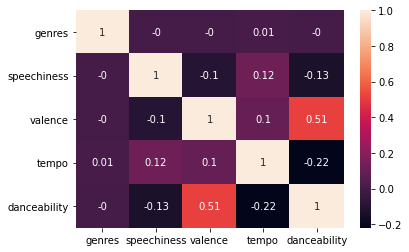

In [38]:

feat_num = len(feature_df)

# plt.figure(figsize=(feat_num,feat_num/2))
corrMatrix = feature_df.corr().round(2)
sn.heatmap(corrMatrix, annot=True)

# plt.tight_layout()
    
plt.show()

In [ ]:
rock.info()